In [2]:
!pip install powerlaw

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

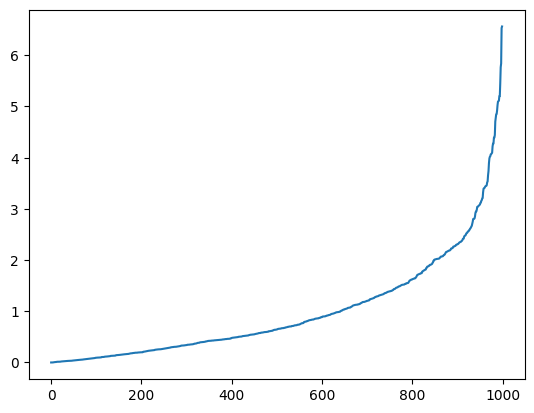

In [40]:
exp_distro = np.random.exponential(size=1000)
exp_distro.sort()
plt.plot(exp_distro)

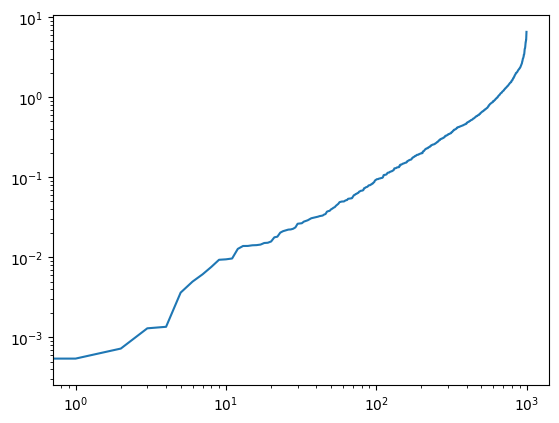

In [41]:
# expected loglog plot of a power log distribution. Linear straight line where the slope is alpha
plt.loglog(exp_distro)

### Power law pattern in FX EUR/USD data (time scale: daily)

In [26]:
df = pd.read_csv("./eur_usd/daily_eur_usd_20_years.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


In [27]:
df["Log_Return"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
df = df[1:]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_Return
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010307
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002809
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003473
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008736
5,2003-12-08,1.216797,1.224005,1.215407,1.222001,1.222001,0,0.002709


In [34]:
# Calculate the histogram of the log returns
log_returns = df["Log_Return"]

In [ ]:
hist, bins = np.histogram(log_returns, bins=300, density=True)

# Compute the centers of the bins
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot on a log-log scale
plt.loglog(bin_centers, hist, marker="o", linestyle="none")
plt.xlabel("Log Return")
plt.ylabel("Probability Density")
plt.title("Log-Log Plot of EUR/USD Log Returns Distribution")
plt.show()

The loglog-plot shows some linear areas where a power law distribution can be likeley

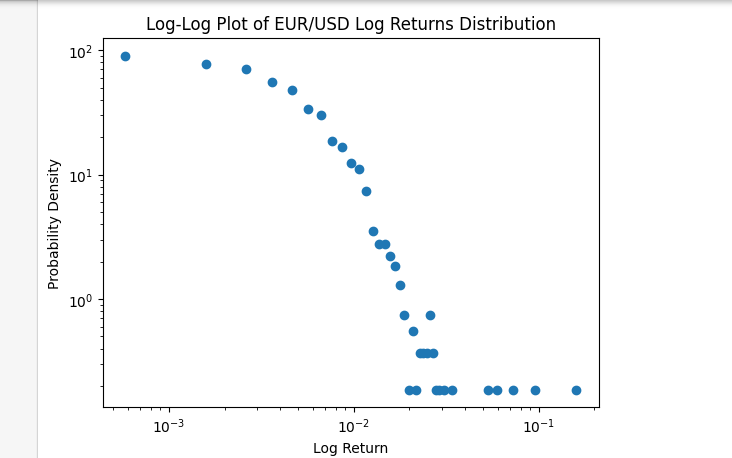

In [ ]:
# Fitting the power law
fit = powerlaw.Fit(log_returns)

# Suggested lower bound
lower_bound = fit.xmin
print(f"lower_bound is {lower_bound}")

# Set the upper bound (optional, often max of dataset)
upper_bound = max(log_returns)

# Apply the bounds and re-fit
filtered_log_returns = log_returns[(log_returns >= lower_bound) & (log_returns <= upper_bound)]
fit = powerlaw.Fit(filtered_log_returns, xmin=lower_bound)

# Plot to visualize
fit.plot_pdf(color='b')
fit.power_law.plot_pdf(color='r', linestyle='--')
plt.xlabel('Log Return')
plt.ylabel('Probability Density')
plt.title('Power Law Fit of Log Returns')
plt.show()

The fitting to a power law resulted in 

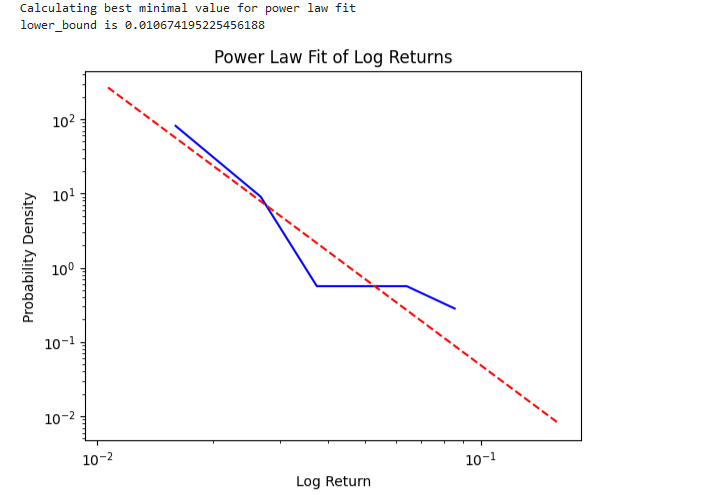

In [ ]:
R, p = fit.distribution_compare('power_law', 'lognormal')
print(f"Loglikelihood ratio test result: R={R}, p-value={p}")

Loglikelihood ratio test result: R=-0.14097968068044808, p-value=0.07262370932034205